<a href="https://colab.research.google.com/github/Evdokia0810/ML_23-24/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Разведочный анализ данных**




Импортируем  необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Читаем датасет и проверяем на наличие дубликатов и пропусков:

In [2]:
credit_card_df = pd.read_parquet('creditcard.parquet')



In [3]:
credit_card_df[credit_card_df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [4]:
credit_card_df[credit_card_df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


Так как есть дубликаты - удалим их:

In [5]:
credit_card_df = credit_card_df.drop_duplicates()

In [6]:
credit_card_df[credit_card_df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [7]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Проверяем сбалансированность классов

In [8]:
credit_card_df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Датасет несбалансирован, так как количество мошенничества мало

Выведем основные статистики признаков

In [9]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000



Значения в столбце   Time являются почти уникальными и не несут в себе полезной информации, поэтому удалим этот столбец

**Разделим данные**

Для пееребалансировки данных воспользуемся методом ClusterCentroids, который реализован в библиотеке imblearn

In [10]:
from imblearn.under_sampling import ClusterCentroids

In [11]:
df = credit_card_df
df = df.drop( columns= ['Time'])
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
CC = ClusterCentroids()
X_b, y_b = CC.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Посмотрим на количества вхождений первого и второго класса в сбалансированной выборке

In [93]:
y_b

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

In [94]:
y_b.value_counts()

0    473
1    473
Name: Class, dtype: int64

Сравниваем статистики получившихся подвыборок и генеральной выборки

In [95]:
X_b.describe()

,V2,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,-0.283754,2.722334,-1.542831,-1.299317,-2.944614,1.896274,-3.073753,-3.332762,-1.868304,-3.233665,-1.031825
std,7.658365,3.177100,8.388895,2.275402,4.391854,2.674276,4.503746,4.692635,3.561371,5.932453,2.391546
min,-63.344698,-2.240552,-43.557242,-13.434066,-24.588262,-3.038237,-18.683715,-19.214325,-14.129855,-25.162799,-9.498746
25%,-1.275955,0.231297,-3.303037,-2.327901,-4.719303,-0.069119,-5.485884,-6.616335,-3.305630,-5.208355,-1.647231
50%,0.643819,1.851312,-0.465109,-0.561317,-1.231761,0.610180,-0.520950,-0.422779,-0.221021,-0.136487,-0.037296
75%,2.865596,4.531484,0.598650,-0.033808,-0.119771,3.537688,0.056593,0.097928,0.146244,0.113277,0.183511
max,22.057729,16.875344,120.589494,5.954927,8.529095,12.018913,7.848392,10.526766,17.315112,6.739384,5.041069


In [96]:
y_b.describe()

count    946.000000
mean       0.500000
std        0.500264
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

Видим, что показатели std признаков стали больше, если сравнивать с генеральной выборкой

Выведем матрицу коррекляций, чтобы выбрать важные признаки для определения мошенничества

<Axes: >

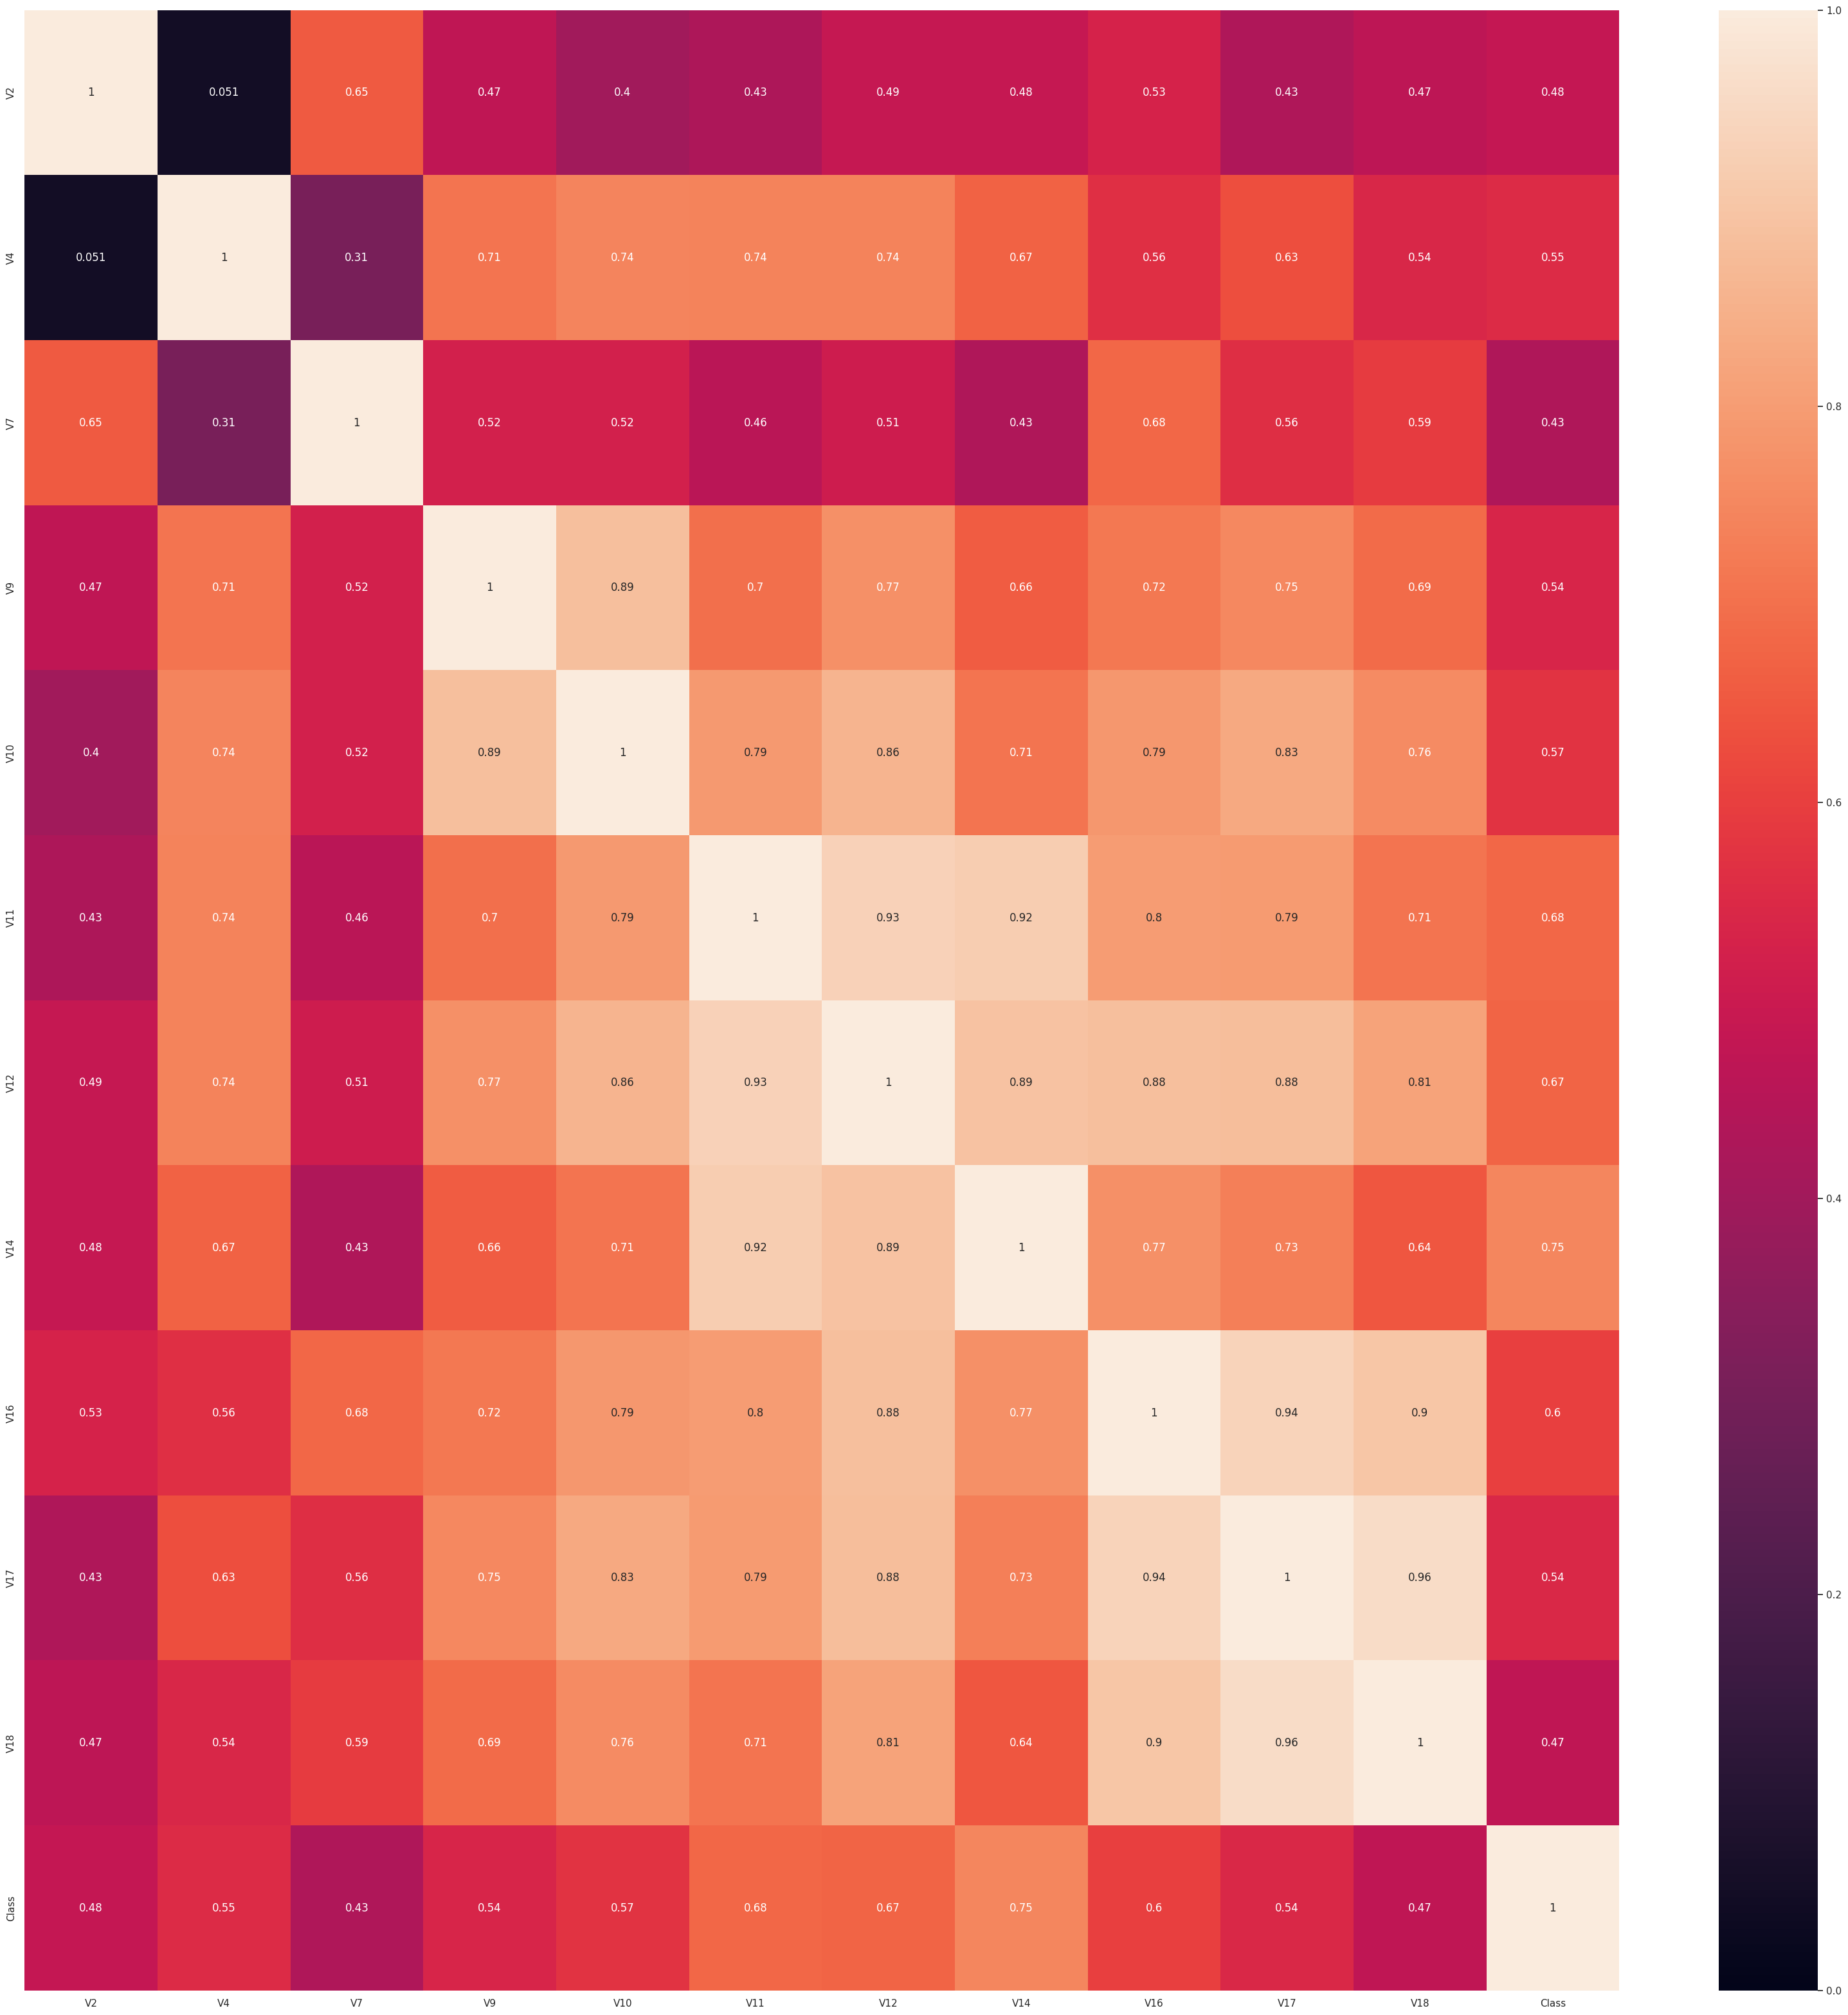

In [97]:
credit_card_balanced_df = pd.concat([X_b, y_b], axis=1)

plt.figure(figsize=(40,40))
sns.set(font_scale=1)
sns.heatmap(
    abs(credit_card_balanced_df.corr()),
    annot=True,
    vmin=0,
    vmax=1,
)

Выбираем признаки влияющие на класс

In [98]:
X_b = X_b[[
    'V2',
    'V4',
    'V7',
    'V9',
    'V10',
    'V11',
    'V12',
    'V14',
    'V16',
    'V17',
    'V18',

]]

Делим новые подвыборки на тестовую и обучающую, используя функцию train_test_split модуля sklearn. Предварительно нормализуем данные с помощью StandardScaler

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_b_normalized = scaler.fit_transform(X_b)

In [101]:
X_b_normalized_train, X_b_normalized_test, y_b_train, y_b_test = train_test_split(
    X_b_normalized,
    y_b,
    random_state = 14,
    test_size=0.2,
)

Обучение моделей на сбалансированной выборке







Для предсказания воспользуемся моделями KNeighborsClassifier, GradientBoosting и SVC. В качестве метрики точности моделей будем использовать precision, recall и f1 меру. Ниже представленны формулы этих метрик:

$ precision = \frac{TP}{TP + FP} $

$ recall = \frac{TP}{TP + FN} $

$ f_1 = 2\frac{precision * recall}{precision + recall} $

где

$ TP $ - True Positive, положительное предсказание соответсвует положительной  истине

$ FP $ - False Positive, положительное предсказание не соответсвует отрицательной истине (ошибка I рода)

$ FN $ - False Negative, отрицательное предсказание не соответсвует положительной истине (ошибка II рода)

Метрика precision характеризует долю объектов, названных положительными и при этом действительно являющихся положительными.
 Метрика recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм, то есть способность алгоритма обнаруживать класс вообще.
 f1 метрика - это среднее гармоническое этих двух метрик.
В нашей задачи, так как мошенников мало по сравнению с остальным количеством данных, нужно обращать внимание именно на recall, так как она содержит ошибку II рода, что в данной задаче критично (мы не хотим принимать мошенников за обычных пользователей).
Метрика precision в частности является показателем количества накопленых ошибок I рода, так как содержит FP, однако в данной задаче, это не столь критично, как ошибки второго рода (лучше признать добросовестного человека мошенником и лишний раз перепроверить его, чем наоборот).

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### 1) KNeighborsClassifier

In [127]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_b_normalized_train, y_b_train);

In [128]:
knn_y_pred = knn_model.predict(X_b_normalized_test)

In [129]:
print(classification_report(y_b_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        91
           1       1.00      0.92      0.96        99

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



In [130]:
confusion_matrix(y_b_test,knn_y_pred)

array([[91,  0],
       [ 8, 91]])

#### 2) GradientBoosting

In [131]:
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_b_normalized_train, y_b_train);

In [132]:
grad_y_pred = grad_boost.predict(X_b_normalized_test)

In [133]:
print(classification_report(y_b_test, grad_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.98      0.96      0.97        99

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



In [134]:
confusion_matrix(y_b_test,grad_y_pred)

array([[89,  2],
       [ 4, 95]])

#### 3) SVC

In [135]:
svc_model = SVC(random_state=42)
svc_model.fit(X_b_normalized_train, y_b_train);

In [136]:
svc_y_pred = svc_model.predict(X_b_normalized_test)

In [137]:
print(classification_report(y_b_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        91
           1       0.96      0.90      0.93        99

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



In [138]:
confusion_matrix(y_b_test,svc_y_pred)

array([[87,  4],
       [10, 89]])


Так как показатели метрик recall и precision выские, это нам говорит о том, что алгоритмы имеют хорошую способность различать мошеннические транзакции и обычные

4) LogisticRegression

In [139]:
logreg_model = LogisticRegression(random_state=42, max_iter=10000)
logreg_model.fit(X_b_normalized_train, y_b_train);


In [140]:
logreg_y_pred = logreg_model.predict(X_b_normalized_test)

In [141]:
print(classification_report(y_b_test, logreg_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        91
           1       0.95      0.90      0.92        99

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



In [119]:
confusion_matrix(y_b_test,logreg_y_pred)

array([[86,  5],
       [10, 89]])

5) DecisionTree

In [142]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_b_normalized_train, y_b_train);

In [143]:
DTC_y_pred = DTC.predict(X_b_normalized_test)

In [144]:
print(classification_report(y_b_test, DTC_y_pred))
(confusion_matrix(y_b_test,DTC_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        91
           1       0.99      0.90      0.94        99

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190



array([[90,  1],
       [10, 89]])

Запустим обученные на сэмплированных данных модели на исходной выборке:

In [145]:
X_feat = X[[
    'V2',
    'V4',
    'V7',
    'V9',
    'V10',
    'V11',
    'V12',
    'V14',
    'V16',
    'V17',
    'V18',

]]

In [146]:
knn_y_pred_1 = knn_model.predict(X_feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [147]:
print(classification_report(y, knn_y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21    283253
           1       0.00      0.98      0.00       473

    accuracy                           0.12    283726
   macro avg       0.50      0.55      0.11    283726
weighted avg       1.00      0.12      0.21    283726



In [148]:
svc_y_pred_1 = svc_model.predict(X_feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [149]:
print(classification_report(y, svc_y_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.13      0.23    283253
           1       0.00      0.32      0.00       473

    accuracy                           0.13    283726
   macro avg       0.50      0.23      0.11    283726
weighted avg       0.99      0.13      0.23    283726



In [150]:
grad_y_pred_1 = grad_boost.predict(X_feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [151]:
print(classification_report(y, grad_y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23    283253
           1       0.00      0.97      0.00       473

    accuracy                           0.13    283726
   macro avg       0.50      0.55      0.12    283726
weighted avg       1.00      0.13      0.23    283726



In [152]:
logreg_y_pred_1 = logreg_model.predict(X_feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [153]:
print(classification_report(y, logreg_y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46    283253
           1       0.00      0.99      0.00       473

    accuracy                           0.30    283726
   macro avg       0.50      0.64      0.23    283726
weighted avg       1.00      0.30      0.46    283726



In [154]:
DTC_y_pred_1 = DTC.predict(X_feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [155]:
print(classification_report(y, DTC_y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57    283253
           1       0.00      0.92      0.01       473

    accuracy                           0.40    283726
   macro avg       0.50      0.66      0.29    283726
weighted avg       1.00      0.40      0.57    283726



Видим плохие результаты для метрик точности

### Обучение моделей на несбалансированной выборке

сравним с метриками на несбалансированной выборке:

In [156]:
X_unb = X[[
    'V2',
    'V4',
    'V7',
    'V9',
    'V10',
    'V11',
    'V12',
    'V14',
    'V16',
    'V17',
    'V18',
]]

X_unb_normalized = scaler.fit_transform(X_unb)

X_unb_normalized_train, X_unb_normalized_test, y_unb_train, y_unb_test = train_test_split(
    X_unb_normalized,
    y,
    random_state=14,
    test_size=0.2,
)

#### 1) KNeighborsClassifier

In [157]:
knn_model_unb = KNeighborsClassifier()
knn_model_unb.fit(X_unb_normalized_train, y_unb_train);

In [158]:
knn_y_pred_unb = knn_model_unb.predict(X_unb_normalized_test)

In [159]:
print(classification_report(y_unb_test, knn_y_pred_unb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.90      0.84      0.87        95

    accuracy                           1.00     56746
   macro avg       0.95      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [160]:
confusion_matrix(y_unb_test,knn_y_pred_unb)

array([[56642,     9],
       [   15,    80]])

#### 2)  GradientBoosting

In [161]:
grad_boost_unb = GradientBoostingClassifier(random_state=42)
grad_boost_unb.fit(X_unb_normalized_train, y_unb_train);

In [162]:
grad_y_pred_unb = grad_boost_unb.predict(X_unb_normalized_test)

In [163]:
print(classification_report(y_unb_test, grad_y_pred_unb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.77      0.51      0.61        95

    accuracy                           1.00     56746
   macro avg       0.89      0.75      0.81     56746
weighted avg       1.00      1.00      1.00     56746



In [164]:
confusion_matrix(y_unb_test,grad_y_pred_unb)

array([[56637,    14],
       [   47,    48]])

#### 3) SVC

In [165]:
svc_model_unb = SVC(random_state=42)
svc_model_unb.fit(X_unb_normalized_train, y_unb_train);

In [166]:
svc_y_pred_unb = svc_model_unb.predict(X_unb_normalized_test)

In [167]:
print(classification_report(y_unb_test, svc_y_pred_unb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [168]:
confusion_matrix(y_unb_test,svc_y_pred_unb)

array([[56649,     2],
       [   29,    66]])

4) LogisticRegression

In [169]:
logreg_model = LogisticRegression(random_state=42, max_iter=10000)
logreg_model.fit(X_unb_normalized_train, y_unb_train);

In [170]:
logreg_y_pred_unb = logreg_model.predict(X_unb_normalized_test)

In [171]:
print(classification_report(y_unb_test, logreg_y_pred_unb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.74      0.58      0.65        95

    accuracy                           1.00     56746
   macro avg       0.87      0.79      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [172]:
confusion_matrix(y_unb_test,logreg_y_pred_unb)

array([[56632,    19],
       [   40,    55]])

5) DecisionTree

In [173]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_unb_normalized_train, y_unb_train);

In [174]:
DTC_y_pred_unb = DTC.predict(X_unb_normalized_test)

In [175]:
print(classification_report(y_unb_test, DTC_y_pred_unb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.79      0.79        95

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [176]:
confusion_matrix(y_unb_test,DTC_y_pred_unb)

array([[56631,    20],
       [   20,    75]])


Видим, что precision в целом осталась на довольно высоком уровне, но метрика recall сильно просела, а это говорит нам о большом количестве ошибок второго рода, что критично для данной задачи

In [180]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results_df = pd.DataFrame(columns=['Model', 'Sampling', 'Precision', 'Recall', 'F1 Score'])

def add_result(model_name, sampling_technique, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    results_df.loc[len(results_df)] = [model_name, sampling_technique, precision, recall, f1]

add_result('KNN', 'Unsampled', y_unb_test, knn_y_pred_unb)
add_result('KNN', 'Resampled', y_b_test, knn_y_pred)
add_result('GradientBoosting', 'Unsampled', y_unb_test, grad_y_pred_unb)
add_result('GradientBoosting', 'Resampled', y_b_test, grad_y_pred)
add_result('SVC', 'Unsampled', y_unb_test, svc_y_pred_unb)
add_result('SVC', 'Resampled', y_b_test, svc_y_pred)
add_result('DecisionTree', 'Unsampled', y_unb_test, DTC_y_pred_unb)
add_result('DecisionTree', 'Resampled', y_b_test, DTC_y_pred)
add_result('SVM', 'Unsampled', y_unb_test, DTC_y_pred_unb)
add_result('SVM', 'Resampled', y_b_test, DTC_y_pred)


print(results_df)

              Model   Sampling  Precision    Recall  F1 Score
0               KNN  Unsampled   0.898876  0.842105  0.869565
1               KNN  Resampled   1.000000  0.919192  0.957895
2  GradientBoosting  Unsampled   0.774194  0.505263  0.611465
3  GradientBoosting  Resampled   0.979381  0.959596  0.969388
4               SVC  Unsampled   0.970588  0.694737  0.809816
5               SVC  Resampled   0.956989  0.898990  0.927083
6      DecisionTree  Unsampled   0.789474  0.789474  0.789474
7      DecisionTree  Resampled   0.988889  0.898990  0.941799
8               SVM  Unsampled   0.789474  0.789474  0.789474
9               SVM  Resampled   0.988889  0.898990  0.941799


Заключение


Таким образом можно сделать вывод, что обучение модели на сбалансированной выборке сильно снижает кол-во ошибок 2 рода, что крайне важно в задачах банковского скролинга